<a href="https://colab.research.google.com/github/gokultej/IIIT_AI-ML_LAB/blob/main/Copy_of_AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [14]:
np.random.seed(42)

In [15]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

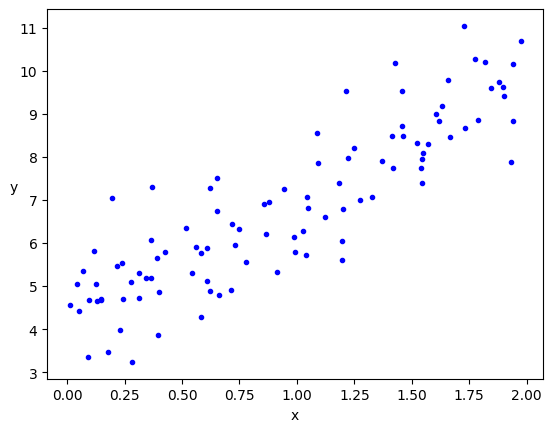

In [16]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

In [17]:
def cal_cost(y_pred, X, y):
    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

In [18]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, X.shape[1]))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it, :] = y_pred.T
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

In [20]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.759
y_pred[1]: 3.173
Final error: 4346.920


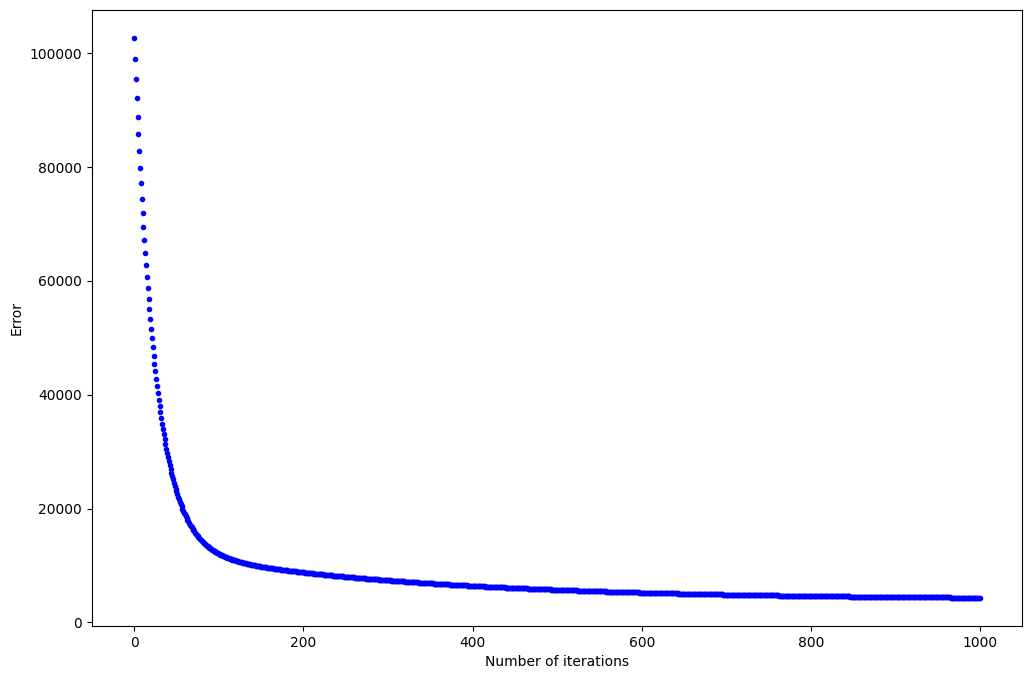

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

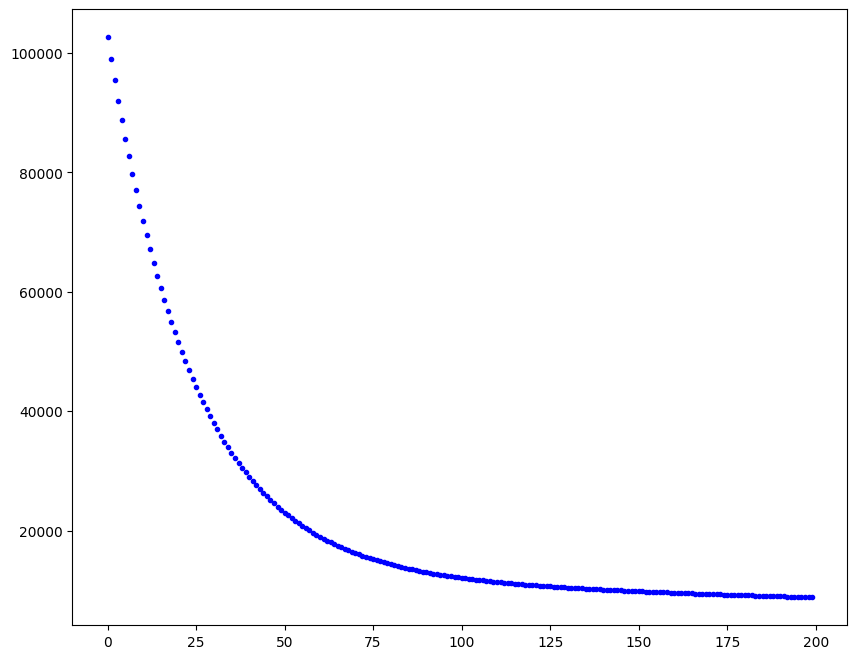

In [27]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

In [22]:
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

In [23]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_batch = X[indices]
        y_batch = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_batch[i: i + batch_size]
            y_i = y_batch[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i[:, 1:]]  # Correctly add bias term
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

Text(0.5, 1.0, 'Stochastic GD with Learning Rate 0.5')

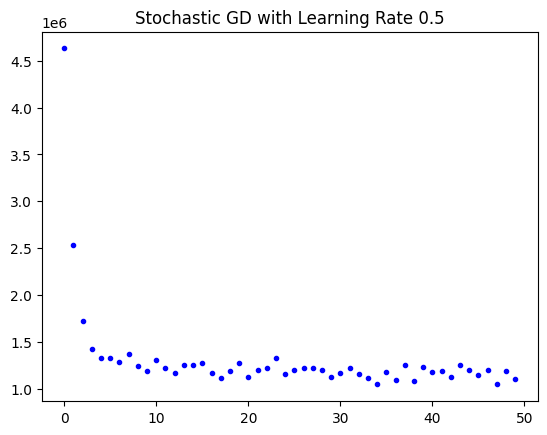

In [28]:
lr_sgd = 0.5
y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(np.c_[np.ones((len(X_real), 1)), X_real], y_real, np.random.randn(X_real.shape[1] + 1, 1), learning_rate=lr_sgd, iterations=50)
plt.figure()
plt.plot(range(50), cost_history_sgd, 'b.')
plt.title(f'Stochastic GD with Learning Rate {lr_sgd}')

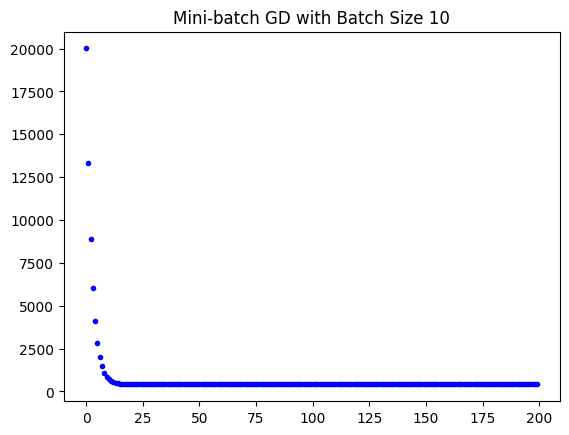

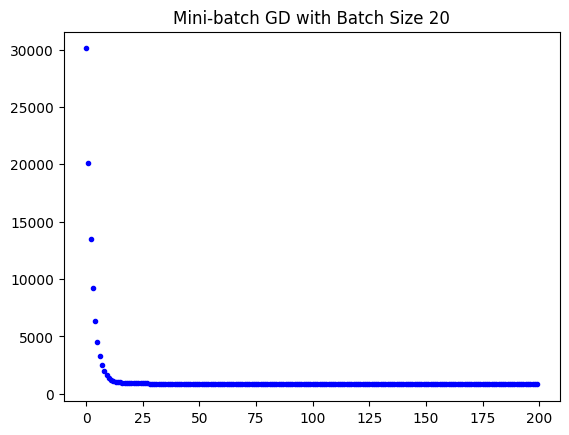

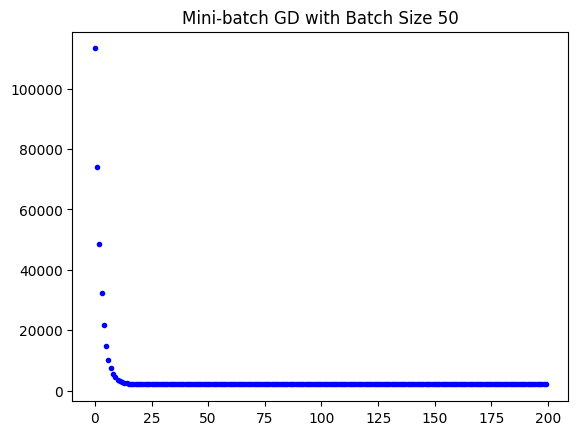

In [29]:
batch_sizes = [10, 20, 50]
for batch_size in batch_sizes:
    y_pred_mb, cost_history_mb = minibatch_gradient_descent(X_b, y, np.random.randn(X_b.shape[1], 1), learning_rate=0.1, iterations=200, batch_size=batch_size)
    plt.figure()
    plt.plot(range(200), cost_history_mb, 'b.')
    plt.title(f'Mini-batch GD with Batch Size {batch_size}')


Text(0.5, 1.0, 'Batch GD with Learning Rate 0.01')

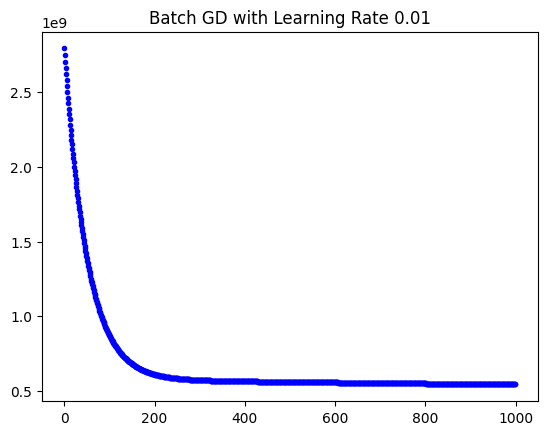

In [30]:
# Test on Batch GD with different learning rates
lr_batch = 0.01
y_pred_batch, cost_history_batch, _ = gradient_descent(np.c_[np.ones((len(X_real), 1)), X_real], y_real, np.random.randn(X_real.shape[1] + 1, 1), learning_rate=lr_batch, iterations=1000)
plt.figure()
plt.plot(range(1000), cost_history_batch, 'b.')
plt.title(f'Batch GD with Learning Rate {lr_batch}')

In [31]:
diabetes = load_diabetes()
X_real, y_real = diabetes.data, diabetes.target.reshape(-1, 1)

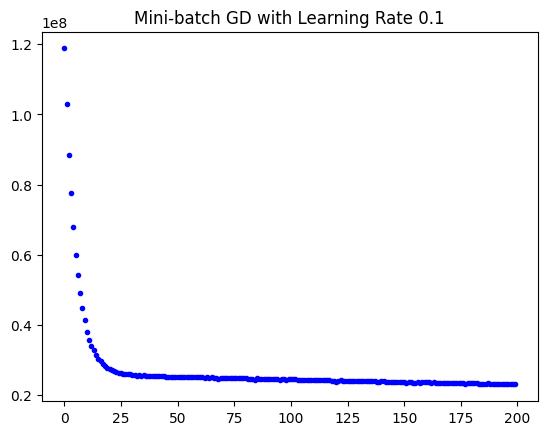

In [32]:
lr_minibatch = 0.1
y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(np.c_[np.ones((len(X_real), 1)), X_real], y_real, np.random.randn(X_real.shape[1] + 1, 1), learning_rate=lr_minibatch, iterations=200, batch_size=20)
plt.figure()
plt.plot(range(200), cost_history_minibatch, 'b.')
plt.title(f'Mini-batch GD with Learning Rate {lr_minibatch}')

plt.show()